# Online Pet Store Sales Trend Analysis and Visualization

_Author_: QH  
_First Version_: 2022-10-25  
_Latest Updated_: 2022-10-27

## Background
This project was inspired by the course project in the Meta Marketing Analytics Certification - Introduction to Data Analytics on Coursera. The original goal was to use Tableau for visualization to create insights for the Pet Company 'Inu + Neko' online retail sales data from 2021-01 to 2021-06.  
I'm extending this project to use python and write it up in jupyter notebook since:
1. The dataset is interesting: It is representative for any retail stores since it has geometric (location of the customers) and chrononical (date of transaction) aspects. In addition, there are multiple products that can be analyzed and can be compared which makes the trend analysis more interesting.
2. It can be written-up as a template for future reference on the retail sales trend analysis using `pandas` and `seaborn`.

## Python and Library Versions

Following libraries are imported and versions for python and the libraries are printed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sys
# setting path
sys.path.append('../..')
# import the utility functions
from py_util import util

In [2]:
print('Python version: ' + sys.version)
package_dict = {'Pandas': pd, 'Numpy': np, 'Matplotlib': matplotlib, 'Seaborn': sns}
util.print_version(package_dict)

Python version: 3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]
Pandas: 1.5.0
Numpy: 1.23.4
Matplotlib: 3.6.1
Seaborn: 0.12.0


## Quick View of the Sales Data

The data has been pre-cleaned for further analysis. The following code loads the pre-cleaned data into a pandas dataframe.

In [3]:
order_df = pd.read_csv('inu_neko_orderline_clean.csv')
order_df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [4]:
# how many years does the order data cover? - All 2021
order_df['trans_year'].value_counts()

2021    38223
Name: trans_year, dtype: int64

In [5]:
# how many months does the order data cover? - 2021-01 to 2021-06
order_df['trans_month'].value_counts()

6    13256
5     9858
4     6884
3     4645
2     2374
1     1206
Name: trans_month, dtype: int64

From the two lines of code above, we know that the sales data records the transactions from 2021-01 to 2021-06. This puts us into context that we will dive into analysis for monthly trend instead of yearly trend.

In [6]:
hour_str = order_df['trans_timestamp'].str.slice(start = 11, stop = 13)
pd.crosstab(hour_str, order_df['trans_hour'])

trans_hour,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
trans_timestamp,,,,,,,,,,,,,,,,,,,,,
03,0,1,0,0,1,0,0,0,0,3,...,0,4,0,0,0,0,0,0,0,0
04,0,3,0,0,2,0,0,0,0,5,...,1,3,1,1,2,0,0,1,2,0
05,8,3,3,7,4,7,3,7,8,4,...,7,12,6,3,12,6,17,4,4,2
06,15,17,18,20,20,14,20,23,20,10,...,23,27,19,22,12,22,27,19,17,15
07,39,51,48,66,59,55,49,53,42,64,...,55,72,72,67,67,61,45,68,59,25
08,104,96,108,116,111,99,97,92,97,83,...,119,122,132,134,139,121,138,113,139,52
09,153,169,149,126,171,128,171,155,194,160,...,179,163,213,210,202,218,219,222,199,98
10,190,232,223,175,200,219,216,270,232,213,...,282,263,288,234,293,288,272,284,288,118
11,180,196,218,213,235,220,201,205,222,248,...,289,222,256,260,281,289,290,239,277,111


In addition, we can notice that transaction timestamp has been transformed into four different variables - trans_year, trans_month, trans_day, trans_hour. Through the cross tab function from `pandas`, it seems hour has not been transformed correctly. So we will create a new datetime variable called _trans_datetime_ in this data.

In [7]:
# Create a date variable
order_df['trans_datetime'] = pd.to_datetime(order_df['trans_timestamp'], format = "%Y-%m-%d %H:%M:%S.%f")
order_df['trans_date'] = order_df['trans_datetime'].dt.normalize()
print(min(order_df['trans_datetime']))
print(max(order_df['trans_datetime']))

2021-01-01 07:35:21.439873
2021-06-30 17:30:52.205912


In [8]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trans_id          38223 non-null  int64         
 1   prod_upc          38223 non-null  int64         
 2   cust_id           38223 non-null  int64         
 3   trans_timestamp   38223 non-null  object        
 4   trans_year        38223 non-null  int64         
 5   trans_month       38223 non-null  int64         
 6   trans_day         38223 non-null  int64         
 7   trans_hour        38223 non-null  int64         
 8   trans_quantity    38223 non-null  int64         
 9   cust_age          38223 non-null  int64         
 10  cust_state        38223 non-null  object        
 11  prod_price        38223 non-null  float64       
 12  prod_title        38223 non-null  object        
 13  prod_category     38223 non-null  object        
 14  prod_animal_type  3822

All the variables are straight forward to understand their meaning by the name. The cust_id, trans_id, trans_datetime, prod_title, trans_quantity and prod_price uniquely define an observation.

In [9]:
order_df.duplicated(subset = ['cust_id', 'trans_id', 'trans_datetime', 'prod_title', 'trans_quantity', 'prod_price']).sum()

0

## Sales Trend

The purpose of the project is to understand, visualize and analyze the sales trend. So the first step is to plot the trend. As can be seen from the previous section, it only contains sales in 2021, so we will first plot the trend daily.

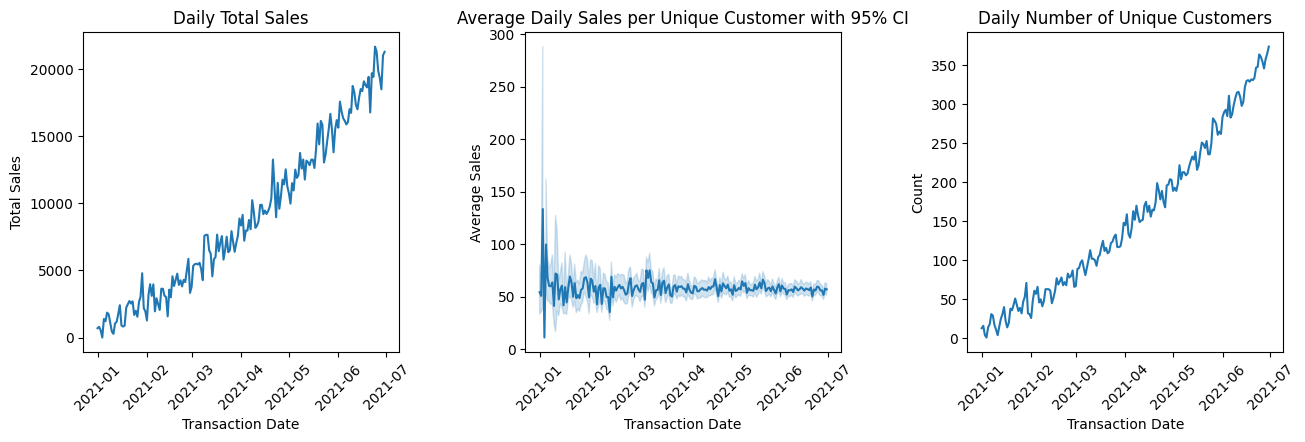

In [10]:
grouped_day = order_df.groupby(by = ['trans_date'], as_index = False).agg({'cust_id': pd.Series.nunique, 'total_sales': sum})
grouped_cust_day = order_df.groupby(by = ['trans_date', 'cust_id'], as_index = False)['total_sales'].sum()
plt.figure(figsize = (15, 4))
# plot the daily total sales
plt.subplot(1,3,1)
g = sns.lineplot(data = grouped_day, x = 'trans_date', y = 'total_sales')
g.set_title('Daily Total Sales')
g.set(xlabel = 'Transaction Date', ylabel = 'Total Sales')
plt.xticks(rotation = 45)
# Plot the average sales per unique customer with CI
plt.subplot(1,3,2)
g = sns.lineplot(data = grouped_cust_day, x = 'trans_date', y = 'total_sales')
g.set_title('Average Daily Sales per Unique Customer with 95% CI')
g.set(xlabel = 'Transaction Date', ylabel = 'Average Sales')
plt.xticks(rotation = 45)
# plot the daily unique number of customers
plt.subplot(1,3,3)
g = sns.lineplot(data = grouped_day, x = 'trans_date', y = 'cust_id')
g.set_title('Daily Number of Unique Customers')
g.set(xlabel = 'Transaction Date', ylabel = 'Count')
plt.xticks(rotation = 45)
plt.subplots_adjust(left = 0.1,
                    bottom = 0.1,
                    right = 0.9,
                    top = 0.9,
                    wspace = 0.4,
                    hspace = 0.4)
plt.show()

As can be seen from the daily plots above, the total sales per day increases over the 6 months. Since the daily average sales per customer is stable over time, and there's an increase in the customer base every day, the reason for the increase in the sale comes from the increased customer base. 

Now we can take a look from a monthly point of view:

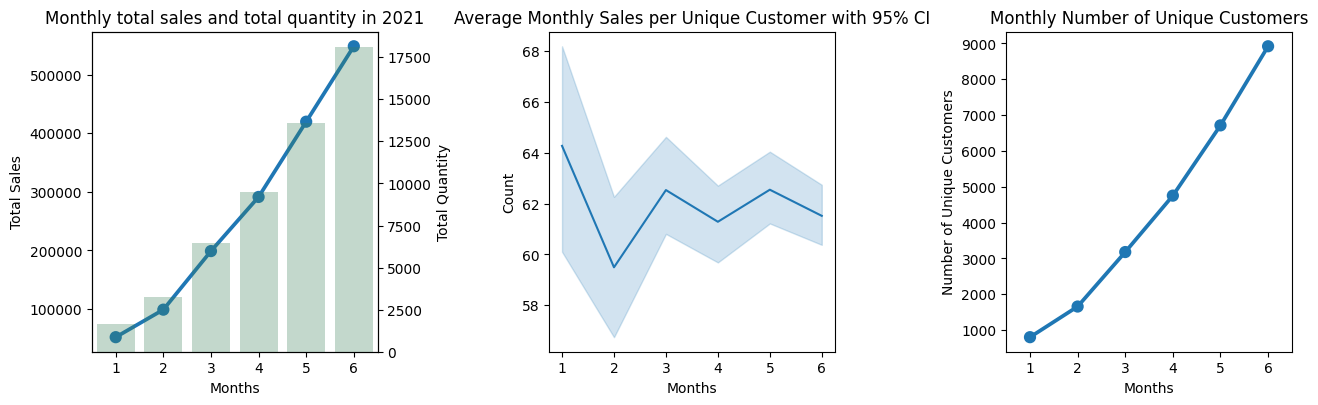

In [11]:
# Monthly total sales over the 6 months
grouped_month = order_df.groupby('trans_month', as_index = False).agg({'cust_id': pd.Series.nunique, 'total_sales': sum, 'trans_quantity': sum})
# Monthly sales per unique customer
cust_total_sales = order_df.groupby(['trans_month', 'cust_id'], as_index=False)['total_sales'].sum()

# Plot the trend
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
g1 = sns.pointplot(data = grouped_month, x = 'trans_month', y = 'total_sales')
g1.set_title('Monthly total sales and total quantity in 2021')
g1.set(ylabel='Total Sales', xlabel = 'Months')
# Total quantities of item sold over the 6 months
ax2 = plt.twinx()
g2 = sns.barplot(data = grouped_month, x = 'trans_month', y = 'trans_quantity', color = 'seagreen', ax = ax2, alpha = 0.3)
g2.set(ylabel = 'Total Quantity')

# Plot the trend
plt.subplot(1,3,2)
# Total number of unique customers per month
g = sns.lineplot(data = cust_total_sales , x = 'trans_month', y = 'total_sales')
g.set(ylabel='Count', xlabel='Months')
g.set_title('Average Monthly Sales per Unique Customer with 95% CI')

# Plot the trend
plt.subplot(1,3,3)
g = sns.pointplot(data = grouped_month , x = 'trans_month', y = 'cust_id')
g.set(ylabel='Number of Unique Customers', xlabel='Months')
g.set_title('Monthly Number of Unique Customers')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.4)
plt.show()

As can be seen above, similar as the daily view, the monthly sales per customer do not change that much over the 6 months while the number of unique customers increases explonentially. This shows the paying customer base increase is the main reason for the total sale increase.

In the next two sections, we will do some deep dive on the increase from both customer demographics and customer purchasing behavior perspectives.

## Customer Demographics 

As the paying customer base increases, are there any changes in the demographics of customers? We will answer this question through the following two aspects: customer age and customer state.

1. Customer Age
    * 1.1 What's the distribution of customers' age? Does it change over the 6 months?
    * 1.2 Is there any correlation between customer age and total sales/total quantity sold?

To answer question 1.1, we need to dedup the transaction data by customer id and transaction month. The reason is that for each customer per month, multiple transactions are possible. To understand the age distribution of the customer base, we don't want to give higher weights to the customers simply because they purchased more.

In [12]:
unique_cust_age_df = order_df[['cust_id', 'trans_month', 'cust_age']]
unique_cust_age_df = unique_cust_age_df[~unique_cust_age_df.duplicated()]
# No duplicates - that means one cust_id has unique age - Check!
unique_cust_age_df.duplicated(subset = ['cust_id', 'trans_month'], keep='first').sum()

0

In [13]:
# 28~29 is the median age
unique_cust_age_df.groupby(['trans_month'])['cust_age'].median()

trans_month
1    28.0
2    29.0
3    29.0
4    29.0
5    29.0
6    29.0
Name: cust_age, dtype: float64

Next step, we can plot the distribution of customers' age using boxplot over the 6 months' time.

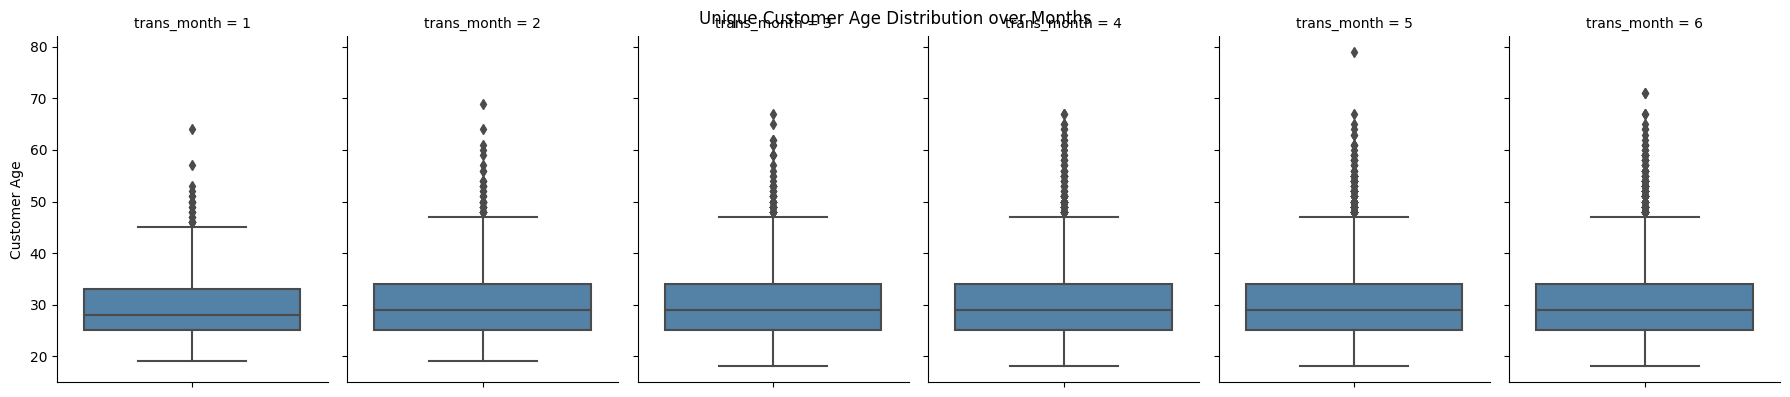

In [14]:
# Are there any changes in the user demographics over the 6 months?
# User's age distribution - no difference by animal type over the 6 months
g = sns.FacetGrid(unique_cust_age_df, col = 'trans_month')
g.fig.set_size_inches((18, 4))
g.map_dataframe(sns.boxplot, y = 'cust_age', color = 'steelblue')
g.set_ylabels('Customer Age')
g.fig.suptitle('Unique Customer Age Distribution over Months')
plt.show()

To answer question 1.2, we can plot the scatter plot between customer age and total sales.

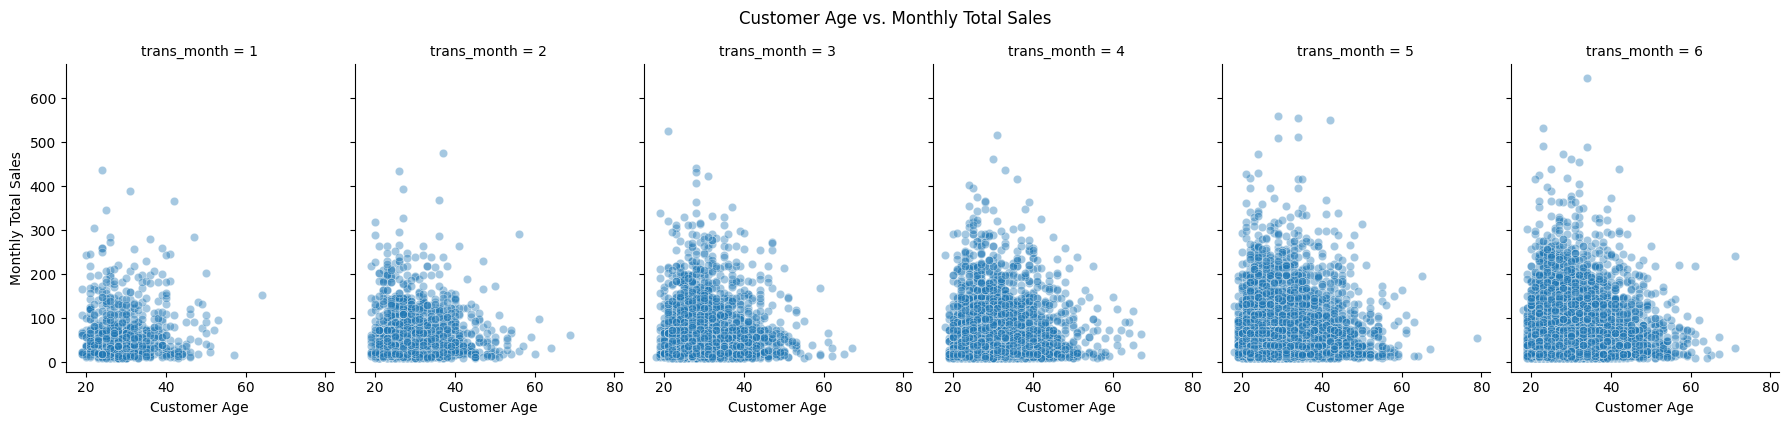

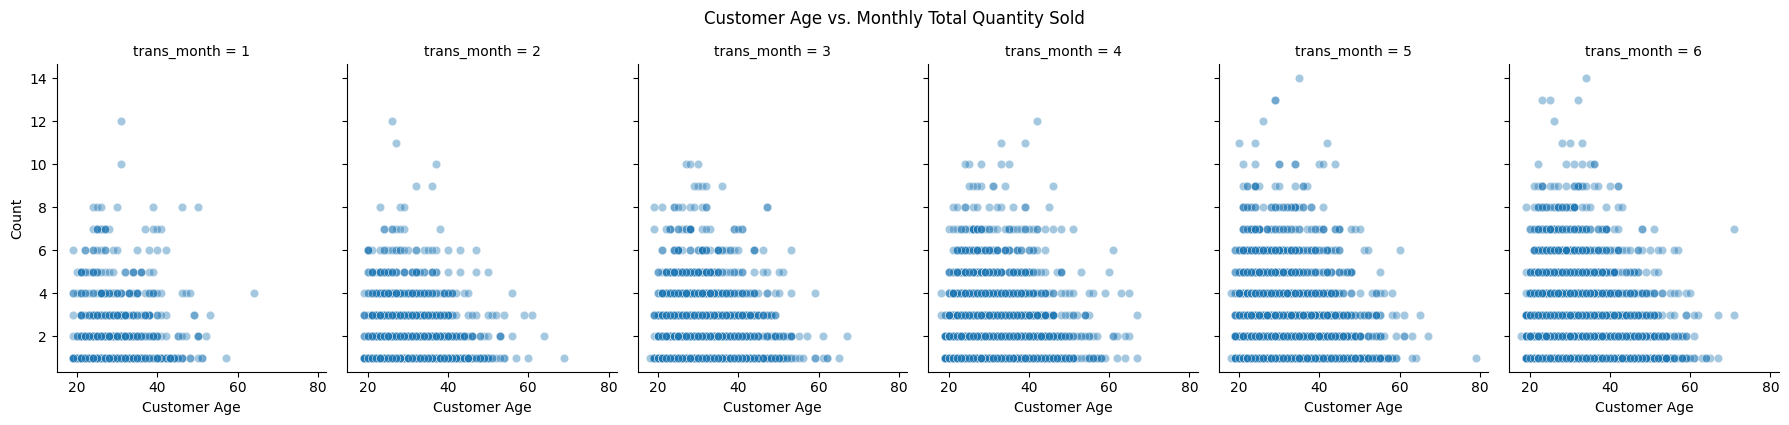

In [15]:
# Any correlations between age and total sales?
grouped_summary = order_df.groupby(by=['cust_id', 'trans_month', 'cust_age'], as_index=False)[['total_sales', 'trans_quantity']].sum()
g = sns.FacetGrid(grouped_summary, col = 'trans_month')
g.fig.set_size_inches((18, 4))
g.map_dataframe(sns.scatterplot, x = 'cust_age', y = 'total_sales', alpha = 0.4)
g.set_xlabels('Customer Age')
g.set_ylabels('Monthly Total Sales')
g.fig.suptitle('Customer Age vs. Monthly Total Sales', y = 1.05)
# Any correlations between age and total quantity sold?
g = sns.FacetGrid(grouped_summary, col = 'trans_month')
g.fig.set_size_inches((18, 4))
g.map_dataframe(sns.scatterplot, x = 'cust_age', y = 'trans_quantity', alpha = 0.4)
g.set_xlabels('Customer Age')
g.set_ylabels('Count')
g.fig.suptitle('Customer Age vs. Monthly Total Quantity Sold', y = 1.05)
plt.show()

In [16]:
age_sales_quantity = grouped_summary.groupby('trans_month', as_index=False)[['cust_age','total_sales', 'trans_quantity']].corr()
age_sales_quantity.loc[[*zip(list(range(6)), ['cust_age']*6)], ['total_sales', 'trans_quantity']]

,,total_sales,trans_quantity
0,cust_age,0.026946,0.033863
1,cust_age,-0.028251,-0.021615
2,cust_age,-0.002039,-0.000601
3,cust_age,0.013565,0.031815
4,cust_age,0.012134,0.018893
5,cust_age,0.002551,-0.003332


__Summary__: 

As can be seen from the plots and table above:
* There's no significant distribution change for customers' age. The medium customer age is around 30. 
* There seems no correlation between customer age and total sales.

2. customer location, i.e. states where customer made purchases.
    * 2.1 What's the distribution of customers' location? Does it change over the 6 months?
    * 2.2 What's the relationship between the customer location and total sales over the 6 months?

To answer question 2.1, we need to dedup by customer id, transaction month and customer state.

In [17]:
unique_cust_state_df = order_df[['cust_id', 'trans_month', 'cust_state']]
unique_cust_state_df = unique_cust_state_df[~unique_cust_state_df.duplicated()]

print(unique_cust_state_df[unique_cust_state_df.duplicated(subset = ['cust_id', 'trans_month'], keep='first')].sort_values(by = ['cust_id', 'trans_month']))
print("\n")
print(unique_cust_state_df[unique_cust_state_df.duplicated(subset = ['cust_id', 'trans_month'], keep='last')].sort_values(by = ['cust_id', 'trans_month']))

      cust_id  trans_month      cust_state
201   1001014            1  North Carolina
314   1001021            1      California
1113  1001024            1      California
135   1001027            1         Indiana
72    1001040            1            Ohio


    cust_id  trans_month    cust_state
15  1001014            1    New Jersey
14  1001021            1  Pennsylvania
9   1001024            1   Connecticut
30  1001027            1  Pennsylvania
35  1001040            1      New York


We noticed that one customer might purchase the items from different state. To see the distribution, we will treat that these clients as if they come from different states.

In [18]:
groupby_df = unique_cust_state_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)['cust_id'].count()
groupby_df2 = unique_cust_state_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)['cust_id'].nunique()
(groupby_df2 != groupby_df).sum()

trans_month    0
cust_state     0
cust_id        0
dtype: int64

Note that in this case, `count()` and `nunique()` will generate the same results.

We can use bar chart or line chart to display the findings.

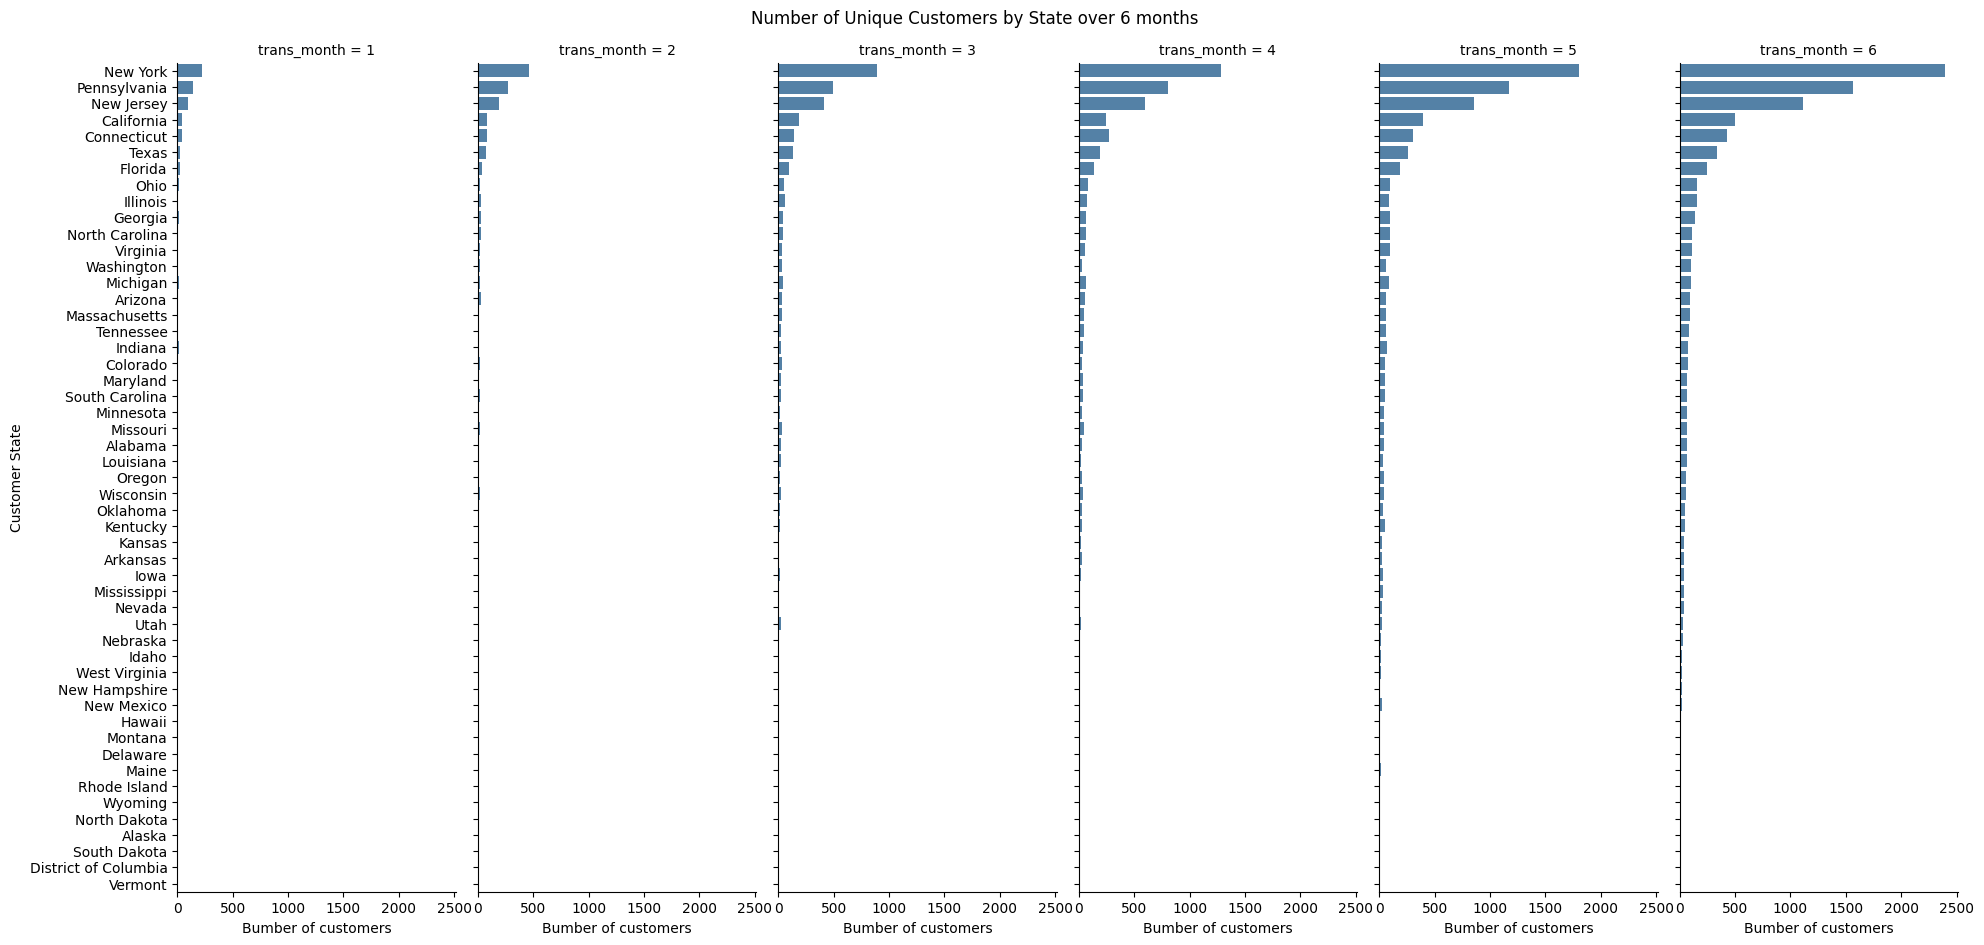

In [19]:
order_state = groupby_df.loc[groupby_df['trans_month'] == 6].sort_values(by = 'cust_id', ascending = False)['cust_state']
g = sns.FacetGrid(groupby_df, col = 'trans_month')
g.map_dataframe(sns.barplot, x = 'cust_id', y = 'cust_state', color = 'steelblue', order = order_state)
g.fig.set_size_inches(20, 12)
g.set_ylabels('Customer State')
g.set_xlabels('Bumber of customers')
g.fig.suptitle('Number of Unique Customers by State over 6 months', y=0.93)
plt.show()

In [20]:
grouped_pivot_tb = groupby_df.pivot(index = 'cust_state', columns = 'trans_month', values = 'cust_id')
# Print the number of customers' top 10 state by month 6
grouped_pivot_tb.sort_values(by = 6, ascending = False).head(10)

trans_month,1,2,3,4,5,6
cust_state,,,,,,
New York,220.0,466.0,895.0,1280.0,1804.0,2393.0
Pennsylvania,145.0,276.0,497.0,805.0,1171.0,1568.0
New Jersey,94.0,189.0,415.0,594.0,852.0,1115.0
California,42.0,86.0,184.0,249.0,396.0,495.0
Connecticut,44.0,82.0,140.0,270.0,306.0,424.0
Texas,26.0,75.0,136.0,189.0,259.0,333.0
Florida,23.0,39.0,99.0,135.0,186.0,248.0
Ohio,15.0,17.0,56.0,83.0,98.0,155.0
Illinois,9.0,26.0,58.0,74.0,91.0,155.0


__Summary__: 

As can be seen from the plot and table above, almost all states have seen increased paid customer base. Specifically, New York, Pennsyvania, New Jersey are the three top states that paid customer base increases the most over the 6 months. By far, we may conclude that increased paid customer base is a reason for the total sale increase. 

## Customer Purchasing Behavior
To understand further whether increased paid customer base is the only reason for the increased sales, we need take a look at customers' puchasing behavior.

The first question we want to ask is to what's the average monthly purchases per customer? This can help us distinguish whether the sales increase is due to number of customer increase or customer's average spending increase or both.

In [21]:
# Aggregate the total sales per customer per month
grouped_summary = order_df.groupby(by = ['trans_month', 'cust_id'], as_index=False)[['total_sales', 'trans_quantity']].sum()
# It seems the average total sales per month is stable!
grouped_summary.groupby(by = 'trans_month', as_index = False)[['total_sales', 'trans_quantity']].mean()

,trans_month,total_sales,trans_quantity
0,1,64.272969,2.080745
1,2,59.495777,1.943976
2,3,62.534009,2.024214
3,4,61.286925,1.998107
4,5,62.547991,2.022937
5,6,61.520315,2.029929


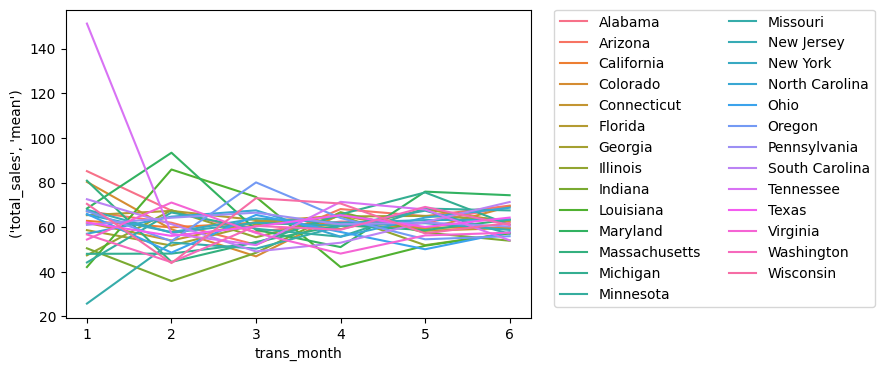

In [25]:
grouped_summary = order_df.groupby(by = ['trans_month', 'cust_state','cust_id'], as_index=False)['total_sales'].sum()
grouped_summary = grouped_summary.groupby(by = ['trans_month', 'cust_state'], as_index = False).agg({'total_sales': ['count', 'mean']})
# Only select those states with greater than or equal to 50 customers in month 6
states_gt50 = grouped_summary.loc[(grouped_summary[('total_sales', 'count')] > 50) & (grouped_summary['trans_month'] == 6), 'cust_state']
grouped_summary_gt50 = grouped_summary[grouped_summary['cust_state'].isin(states_gt50)]
#grouped_summary_gt50_pivot = grouped_summary_gt50.pivot(columns = 'trans_month', index = 'cust_state', values = ('total_sales', 'mean')).sort_values(by = 6, ascending = False)
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=grouped_summary_gt50, x='trans_month', y=('total_sales', 'mean'), hue='cust_state')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad=0, ncol = 2)
plt.show()

__Summary__:  

As can be seen from the tables above, the average monthly spending per customer does not change very much. This indicates that the growth is mainly due to the increase of paid customer base.

Since we now know that the increase is due to paid customer base increase. We want to break down the total sales to understand whether the preferences of product change. Questions like what's the total sales by product animal type and product category can help to understand customer's preference.

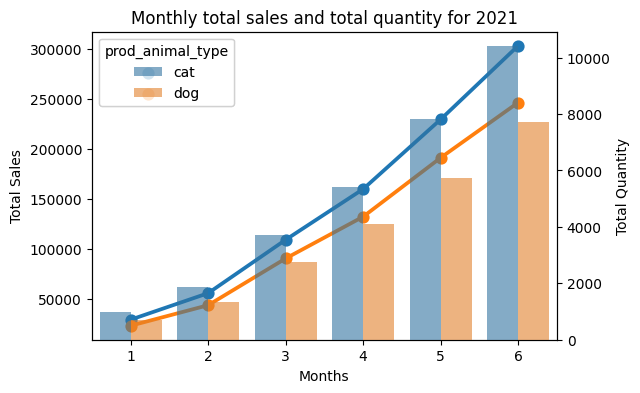

In [ ]:
# Group the total sales and quantity by product animal type
grouped_df = order_df.groupby(by = ['trans_month', 'prod_animal_type'], as_index=False)
# Total sales change over the 6 months
grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
plt.figure(figsize = (6, 4))
sns.pointplot(data = grouped_sales, x = 'trans_month', y = 'total_sales', hue = 'prod_animal_type')
plt.title('Monthly total sales and total quantity for 2021')
plt.ylabel('Total Sales')
plt.xlabel('Months')
# Total quantities of item sold over the 6 months
ax2 = plt.twinx()
sns.barplot(data = grouped_sales, x = 'trans_month', y = 'trans_quantity',  hue = 'prod_animal_type', ax = ax2, alpha = 0.6)
plt.ylabel('Total Quantity')
plt.xlabel('Months')
plt.show()

__Summary__: 

As can be seen from the chart above, compared to dog, products that is for cats have larger number of item sold and higher sales over the 6 months.

In [ ]:
# Group the total sales and quantity by product animal type
grouped_df = order_df.groupby(by = ['trans_month', 'prod_animal_type', 'prod_category'], as_index=False)
grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()

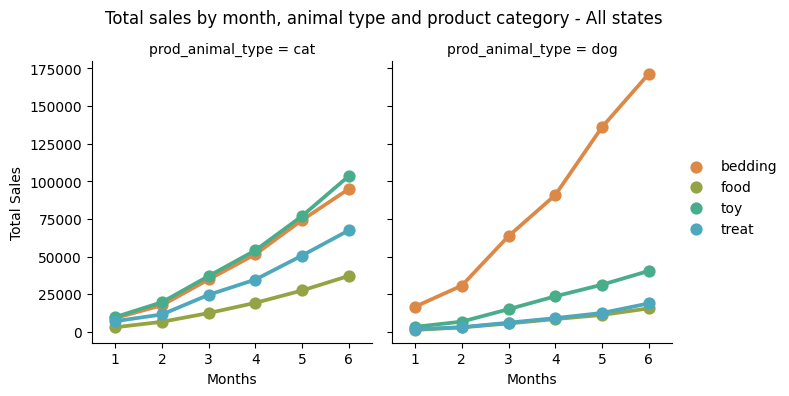

In [ ]:
# Total sales change over the 6 months by product anumal type and product category
g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
g.fig.set_size_inches(7, 4)
g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'total_sales', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
g.add_legend()
g.set_ylabels('Total Sales')
g.set_xlabels('Months')
g.fig.subplots_adjust(top = 0.85)
g.fig.suptitle('Total sales by month, animal type and product category - All states')
plt.show()

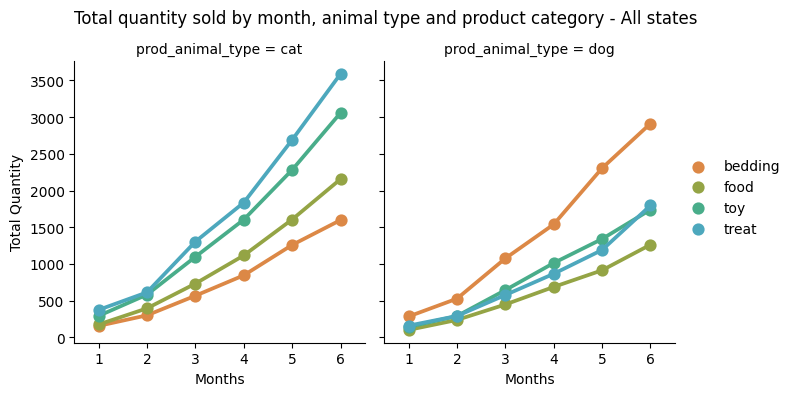

In [ ]:
# Total quantity change over the 6 months by product anumal type and product category
g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
g.fig.set_size_inches(7, 4)
g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'trans_quantity', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
g.add_legend()
g.set_ylabels('Total Quantity')
g.set_xlabels('Months')
g.fig.subplots_adjust(top = 0.85)
g.fig.suptitle('Total quantity sold by month, animal type and product category - All states')
plt.show()

In [ ]:
# What's the average product price per product animal type and product category?
order_df.groupby(['prod_animal_type', 'prod_category'])['prod_price'].mean()

prod_animal_type  prod_category
cat               bedding          59.835751
                  food             17.127809
                  toy              33.769952
                  treat            18.832678
dog               bedding          58.881233
                  food             12.296785
                  toy              23.274285
                  treat            10.489502
Name: prod_price, dtype: float64

__Summary__: If we drill down by product category, there are some interesting findings:
* Cat: 
    * In terms of quantity sold, all for categories for cats are increasing but the four categories increase rates are different. Specifically, the treat category increased the most, bedding increased the least
    * In terms of total sales, because bedding has the highest average price per item, it has similar level of increase as toys. While for food and treat, though quantity increased so much, the total sales did not increase as much because of low price per item.
* Dog: 
    * In terms of quantity sold and total sales, bedding category wins all other categories. 

By comparing cat and dog type, cat products have more quantity sold than dogs. In addition, the average price per item for cat product category is higher than dogs, it leads to more sales in cat than dog.

### A closer look at three top states

Similar observation can been spotted for product category, product animal type for the three top sales states.

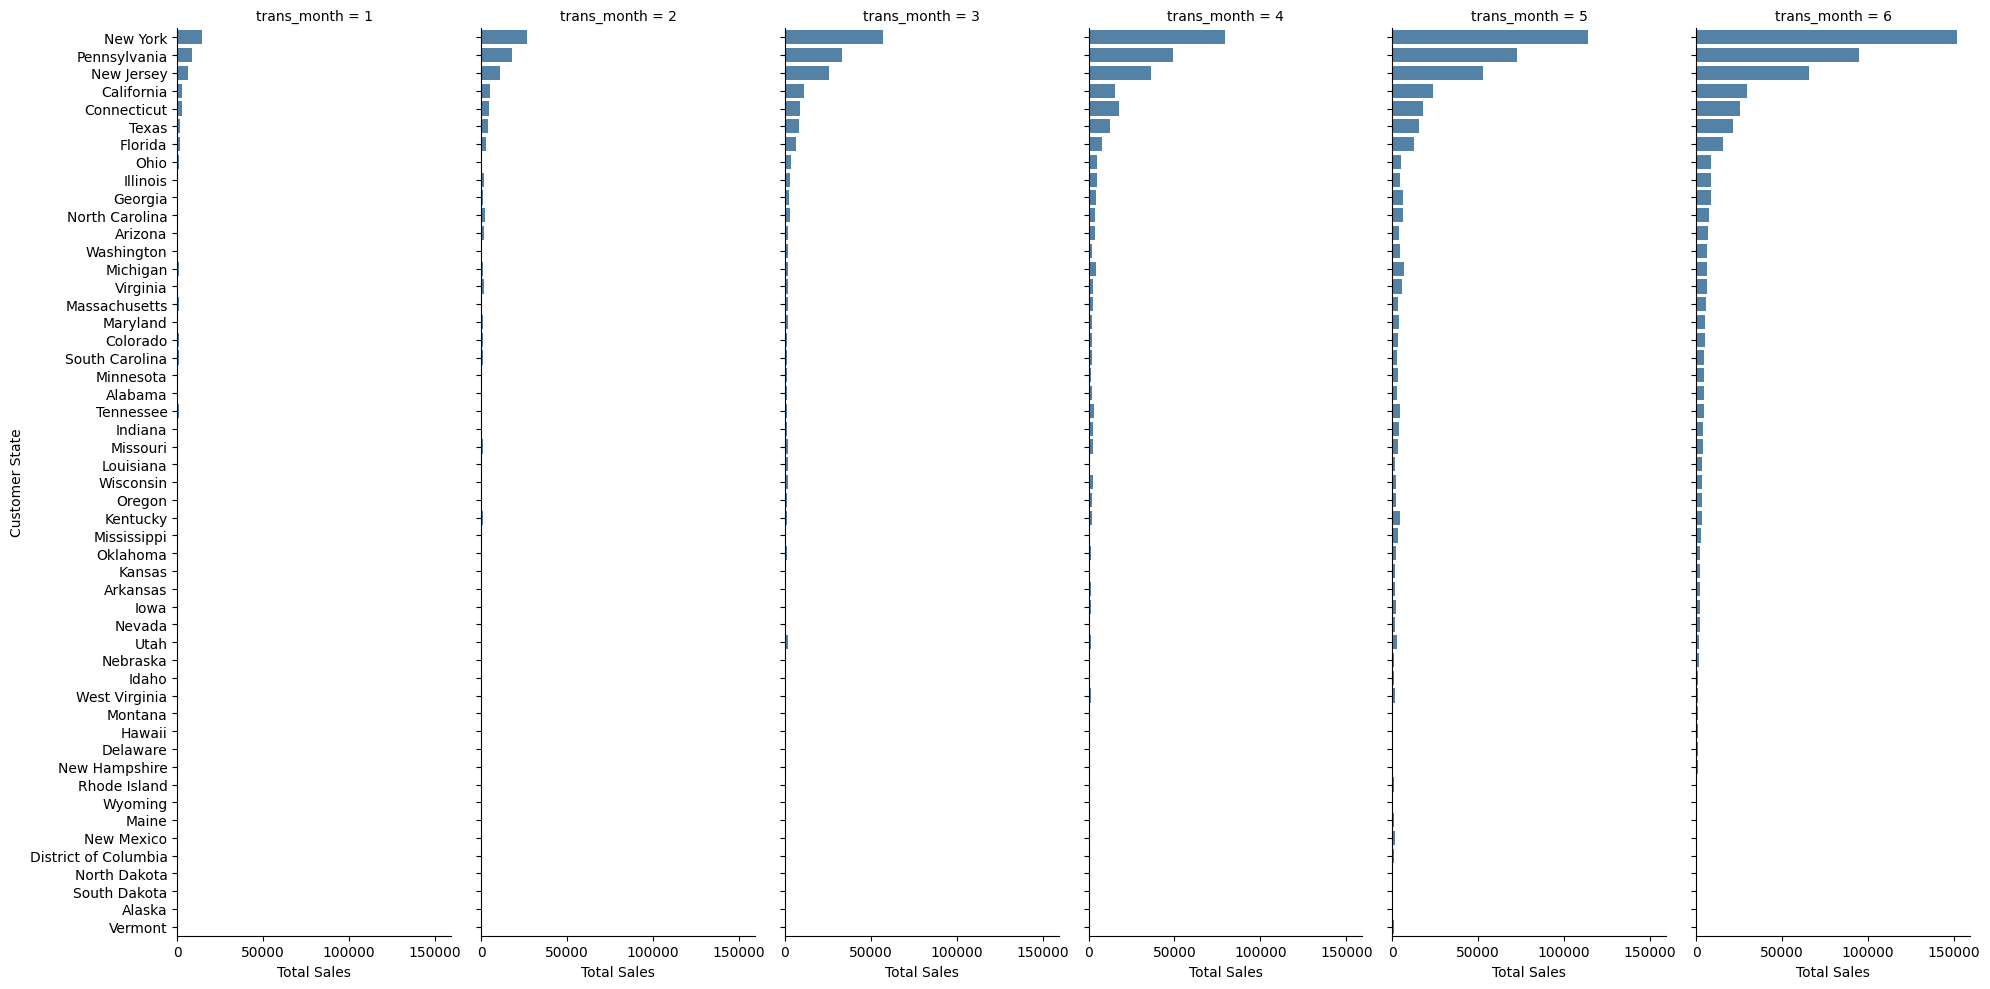

In [ ]:
# User's location distribution 
grouped_df = order_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)
grouped_state_df = grouped_df[['total_sales', 'trans_quantity']].sum()
order_state = grouped_state_df.loc[grouped_state_df['trans_month'] == 6].sort_values(by = 'total_sales', ascending = False)['cust_state']
g = sns.FacetGrid(grouped_state_df, col = 'trans_month')
g.fig.set_size_inches(20, 10)
g.map_dataframe(sns.barplot, x = 'total_sales', y = 'cust_state', color = 'steelblue', order = order_state)
g.set_ylabels('Customer State')
g.set_xlabels('Total Sales')
plt.show()

In [ ]:
# We will take a closer look at the top 3 states: New York, Pennsylvania and New Jersey
def plot_by_MA(df, cond):
    # Group the total sales and quantity by product animal type
    grouped_df = df.groupby(by = ['trans_month', 'prod_animal_type'], as_index=False)
    # Total sales change over the 6 months
    grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
    sns.pointplot(data = grouped_sales, x = 'trans_month', y = 'total_sales', hue = 'prod_animal_type')
    plt.suptitle('Total monthly sales and item quantity for 2021')
    plt.title(f'{cond}')
    plt.ylabel('Total Sales')
    plt.xlabel('Months')
    # Total quantities of item sold over the 6 months
    ax2 = plt.twinx()
    sns.barplot(data = grouped_sales, x = 'trans_month', y = 'trans_quantity',  hue = 'prod_animal_type', ax = ax2, alpha = 0.6)
    plt.ylabel('Total count')
    plt.xlabel('Months')

In [ ]:
def plot_by_MAC(df, cond):
    # Group the total sales and quantity by product animal type
    grouped_df = df.groupby(by = ['trans_month', 'prod_animal_type', 'prod_category'], as_index=False)
    grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
    # Total sales change over the 6 months by product anumal type and product category
    g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
    g.fig.set_size_inches(7, 4)
    g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'total_sales', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
    g.add_legend()
    g.set_ylabels('Total Sales')
    g.set_xlabels('Months')
    g.fig.subplots_adjust(top = 0.85)
    g.fig.suptitle(f'Total sales by month, animal type and product category - {cond}')

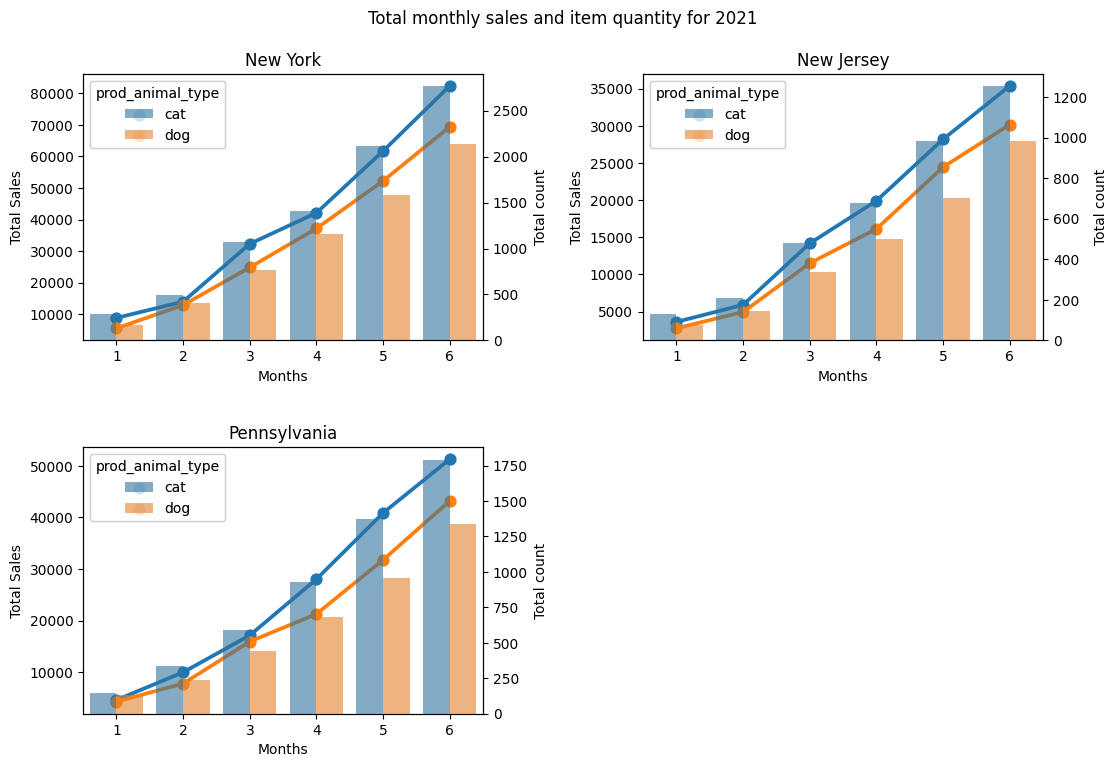

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plot_by_MA(order_df[order_df['cust_state'] == 'New York'], 'New York')
plt.subplot(2,2,2)
plot_by_MA(order_df[order_df['cust_state'] == 'New Jersey'], 'New Jersey')
plt.subplot(2,2,3)
plot_by_MA(order_df[order_df['cust_state'] == 'Pennsylvania'], 'Pennsylvania')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

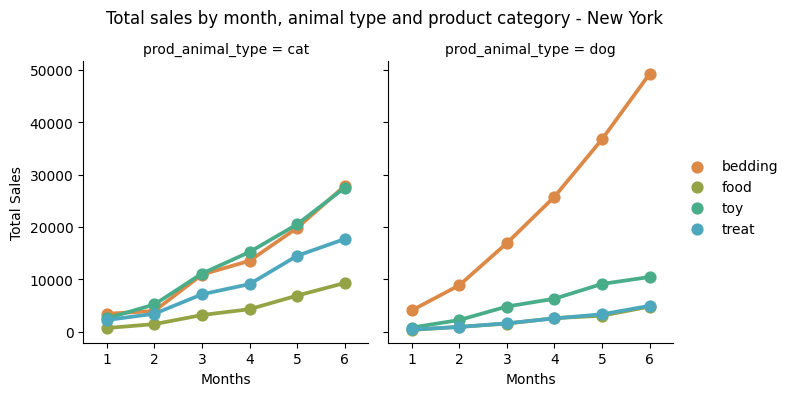

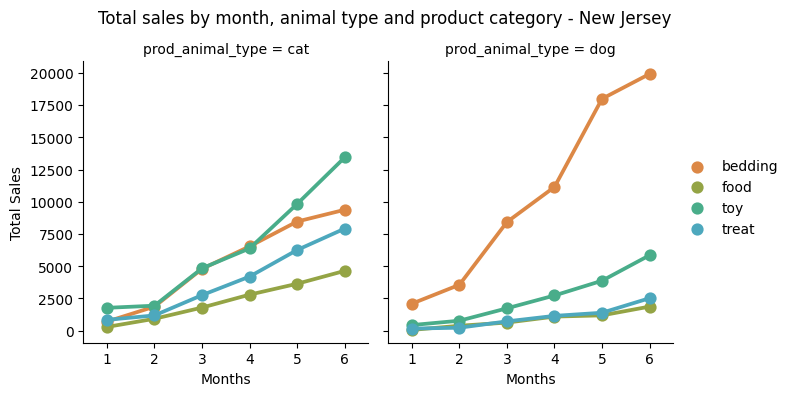

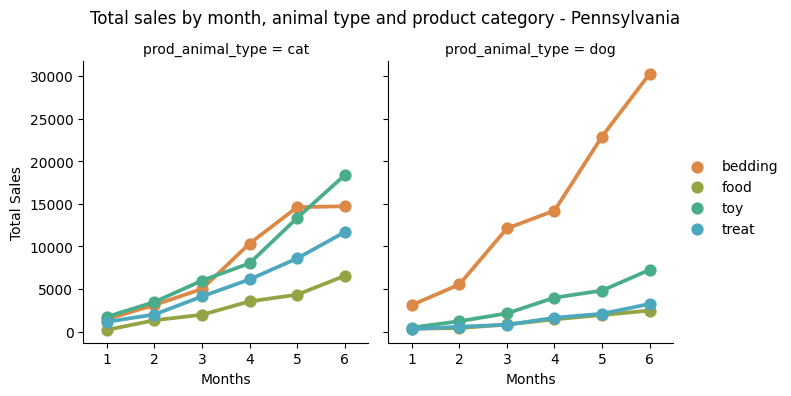

In [ ]:
plot_by_MAC(order_df[order_df['cust_state'] == 'New York'], 'New York')
plot_by_MAC(order_df[order_df['cust_state'] == 'New Jersey'], 'New Jersey')
plot_by_MAC(order_df[order_df['cust_state'] == 'Pennsylvania'], 'Pennsylvania')
plt.show()

## Other Interesting Findings

In [ ]:
# What's the price for each product title?
order_df.groupby(['prod_animal_type', 'prod_category', 'prod_title'])['prod_price'].value_counts()

prod_animal_type  prod_category  prod_title              prod_price
cat               bedding        Cat Cave                72.99         1762
                                 Snoozer Hammock         45.99         1674
                  food           Purr Mix                12.99         1359
                                 Yum Fish-Dish           18.95         3086
                  toy            Ball and String         28.45         1379
                                 Foozy Mouse             32.99         1288
                                 Kitty Climber           35.99         2438
                                 Scratchy Post           35.98         1325
                  treat          Feline Fix Mix          19.99         2412
                                 Purrfect Puree          18.95         1795
                                 Snack-em Fish           15.99         1150
                                 Tuna Tasties            18.95         2276
dog               be

In [ ]:
dog_bedding = order_df[(order_df['prod_title'] == 'Reddy Beddy')].sort_values(by=['trans_datetime'])
# plot the price by transation date - Seems no pattern at all.
#plt.figure(figsize=(20, 4))
#sns.lineplot(data=dog_bedding, x='trans_datetime', y='prod_price', dashes =(1, 1))
#plt.show()

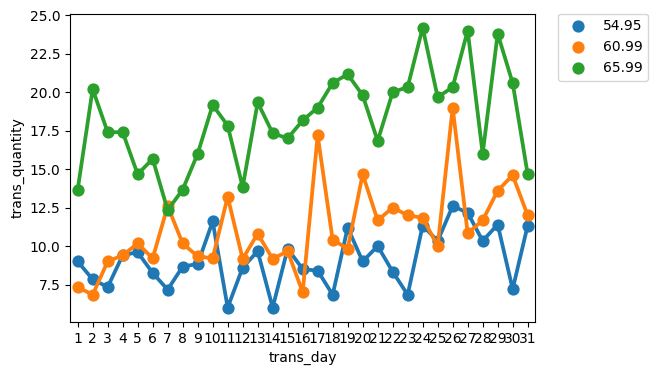

In [ ]:
# Seems only Reddy Beddy has changed price. Let's drill into this product to see which month did the price change?
dog_bedding_summary_day = dog_bedding.groupby(['trans_month', 'trans_day', 'prod_price'], as_index = False)['trans_quantity'].sum()
dog_bedding_summary_day = dog_bedding_summary_day.groupby(['trans_day', 'prod_price'], as_index = False)['trans_quantity'].mean()
plt.figure(figsize = (6, 4))
sns.pointplot(data = dog_bedding_summary_day, x = 'trans_day', y = 'trans_quantity', hue = 'prod_price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

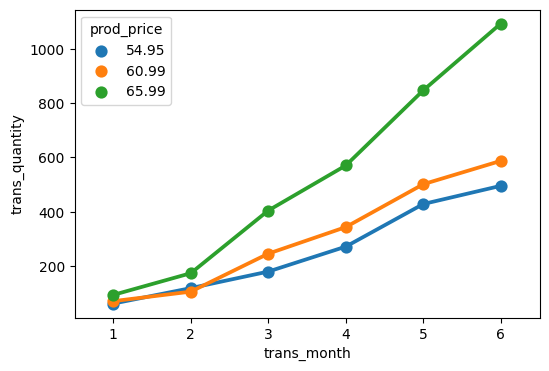

In [ ]:
# What's the total quantity sold per price level and month?
dog_bedding_summary_month = dog_bedding.groupby(['trans_month', 'prod_price'], as_index = False)['trans_quantity'].sum()
dog_bedding_summary_month = dog_bedding_summary_month.astype({'trans_month': 'category'})
plt.figure(figsize = (6, 4))
sns.pointplot(data = dog_bedding_summary_month, x = 'trans_month', y = 'trans_quantity', hue = 'prod_price')
plt.show()

__Summary__: 

It is interesting to find that all products do not change price over the 6 months exept for the 'Reddy Beddy'. So we take a deeper look at the 'Reddy Beddy' product. And it is even more interesting to see that the higher the product price, the higher quantities sold. And during a month, there's an increase trend in quantity sold from the begining towards the late of a month.

## Corhort Analysis

In [ ]:
cust_first_trans = order_df.groupby(['cust_id'], as_index = False)['trans_datetime'].first()
cust_first_trans['cohort_month'] = cust_first_trans['trans_datetime'].dt.month
order_df = order_df.merge(cust_first_trans[['cust_id', 'cohort_month']], how = 'inner', on = 'cust_id')
order_df['cohort_index'] = order_df['trans_datetime'].dt.month - order_df['cohort_month'] + 1

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales,trans_datetime,trans_date,cohort_month,cohort_index
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99,2021-01-01 07:35:21.439873,2021-01-01,1,1
1,10304045,344538897332,1001019,2021-03-15 10:03:20.671789,2021,3,15,15,1,20,New York,19.99,Feline Fix Mix,treat,cat,19.99,2021-03-15 10:03:20.671789,2021-03-15,1,3
2,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95,2021-01-01 09:33:37.499660,2021-01-01,1,1
3,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99,2021-01-01 09:33:37.499660,2021-01-01,1,1
4,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90,2021-01-01 09:33:37.499660,2021-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38218,10327924,621046126170,1022135,2021-06-30 15:32:27.963501,2021,6,30,30,1,23,New Jersey,22.99,Tug-a-Back,toy,dog,22.99,2021-06-30 15:32:27.963501,2021-06-30,6,1
38219,10327860,287663658863,1022098,2021-06-30 15:37:12.821020,2021,6,30,30,1,25,New York,9.95,All Veggie Yummies,treat,dog,9.95,2021-06-30 15:37:12.821020,2021-06-30,6,1
38220,10327960,140160459467,1022157,2021-06-30 15:45:09.872732,2021,6,30,30,2,31,Pennsylvania,48.95,Snoozer Essentails,bedding,dog,97.90,2021-06-30 15:45:09.872732,2021-06-30,6,1
38221,10328009,425361189561,1022189,2021-06-30 15:57:44.295104,2021,6,30,30,2,53,New Jersey,15.99,Snack-em Fish,treat,cat,31.98,2021-06-30 15:57:44.295104,2021-06-30,6,1


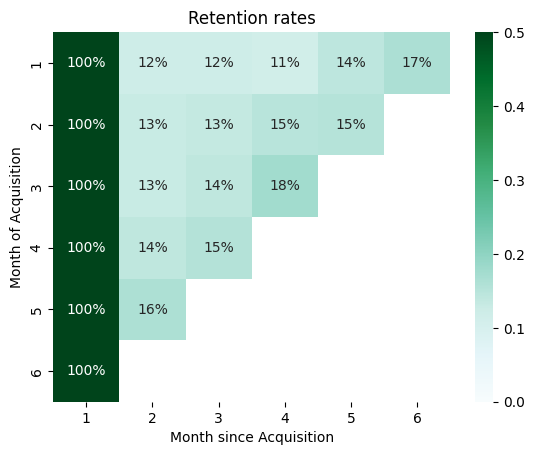

In [ ]:
grouped_df = order_df.groupby(['cohort_month', 'cohort_index'], as_index = False)['cust_id'].nunique()
grouped_df.rename(columns = {'cust_id': 'count'}, inplace = True)
cohort_counts = grouped_df.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'count')
# cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]
# Divide all values in the cohort counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)
# Heat map on the retention rate
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')
plt.xlabel('Month since Acquisition')
plt.ylabel("Month of Acquisition")
plt.show()

In [ ]:
grouped_df = order_df.groupby(['cohort_month', 'cohort_index'], as_index = False)['trans_quantity'].mean()
average_quantity = grouped_df.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'trans_quantity')
average_quantity .round(1)

cohort_index,1,2,3,4,5,6
cohort_month,,,,,,
1,1.4,1.4,1.3,1.4,1.4,1.3
2,1.4,1.5,1.4,1.4,1.4,NaN
3,1.4,1.4,1.3,1.4,NaN,NaN
4,1.4,1.4,1.4,NaN,NaN,NaN
5,1.4,1.4,NaN,NaN,NaN,NaN
6,1.4,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouped_df = order_df.groupby(['cohort_month', 'cohort_index'], as_index = False)['total_sales'].mean()
average_sales = grouped_df.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'total_sales')
average_sales .round(1)

cohort_index,1,2,3,4,5,6
cohort_month,,,,,,
1,42.9,41.2,39.8,40.5,40.8,40.5
2,41.6,46.2,37.7,40.6,41.0,NaN
3,42.7,42.0,42.1,41.9,NaN,NaN
4,42.6,43.7,41.4,NaN,NaN,NaN
5,42.6,41.8,NaN,NaN,NaN,NaN
6,41.3,NaN,NaN,NaN,NaN,NaN


## Conclusion

* General Trend
    * Customer Demographics
    * Customer purchasing behavior
        * Average sales per customer per day
        * Sales by Product Animal type and Product category
        * Retention rate, repurchasing behavior